In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Applications of clustering

### Example 1: Identifying patterns 

In [4]:
data = pd.read_csv('traffic.csv',parse_dates=True,index_col='Date')
data.head()

Fremont Bridge Total  Fremont Bridge East Sidewalk  \
Date                                                                      
2019-11-01 00:00:00                  12.0                           7.0   
2019-11-01 01:00:00                   7.0                           0.0   
2019-11-01 02:00:00                   1.0                           0.0   
2019-11-01 03:00:00                   6.0                           6.0   
2019-11-01 04:00:00                   6.0                           5.0   

                     Fremont Bridge West Sidewalk  
Date                                               
2019-11-01 00:00:00                           5.0  
2019-11-01 01:00:00                           7.0  
2019-11-01 02:00:00                           1.0  
2019-11-01 03:00:00                           0.0  
2019-11-01 04:00:00                           1.0

In [5]:
data_table = pd.pivot_table(data = data, values = 'Fremont Bridge Total', index = data.index.time, columns = data.index.date)
data_table

2012-10-03  2012-10-04  2012-10-05  2012-10-06  2012-10-07  \
00:00:00        13.0        18.0        11.0        15.0        11.0   
01:00:00        10.0         3.0         8.0        15.0        17.0   
02:00:00         2.0         9.0         7.0         9.0         3.0   
03:00:00         5.0         3.0         4.0         3.0         6.0   
04:00:00         7.0         8.0         9.0         5.0         3.0   
05:00:00        31.0        26.0        25.0         5.0         9.0   
06:00:00       155.0       142.0       105.0        27.0        17.0   
07:00:00       352.0       319.0       319.0        33.0        26.0   
08:00:00       437.0       418.0       370.0       105.0        69.0   
09:00:00       276.0       241.0       212.0       114.0       103.0   
10:00:00       118.0       120.0       119.0       115.0       108.0   
11:00:00        42.0       108.0       104.0       124.0       165.0   
12:00:00        76.0       104.0       101.0       164.0       191.0   
13:00:00        90.0       126.0       112.0       177.0       228.0   
14:00:00       128.0       119.0       125.0       203.0       241.0   
15:00:00       164.0       147.0       164.0       211.0       231.0   
16:00:00       315.0       275.0       310.0       183.0       225.0   
17:00:00       583.0       507.0       434.0       180.0       191.0   
18:00:00       380.0       378.0       316.0        96.0       113.0   
19:00:00       128.0       164.0       115.0        78.0        49.0   
20:00:00        80.0        83.0        68.0        43.0        55.0   
21:00:00        63.0        70.0        42.0        33.0        47.0   
22:00:00        49.0        46.0        36.0        34.0        18.0   
23:00:00        17.0        41.0        32.0        34.0        16.0   

          2012-10-08  2012-10-09  2012-10-10  2012-10-11  2012-10-12  ...  \
00:00:00         9.0        12.0        15.0        21.0        17.0  ...   
01:00:00         4.0         3.0         3.0        10.0        13.0  ...   
02:00:00         5.0         4.0         3.0        13.0         5.0  ...   
03:00:00         5.0         8.0         4.0         2.0         7.0  ...   
04:00:00         5.0         9.0         5.0        12.0         5.0  ...   
05:00:00        23.0        31.0        25.0        12.0        14.0  ...   
06:00:00       137.0       153.0       149.0        43.0        87.0  ...   
07:00:00       327.0       368.0       340.0       304.0       183.0  ...   
08:00:00       457.0       462.0       435.0       404.0       268.0  ...   
09:00:00       278.0       275.0       255.0       189.0       145.0  ...   
10:00:00        97.0        94.0        97.0         4.0        62.0  ...   
11:00:00        99.0        74.0        55.0        92.0        58.0  ...   
12:00:00       108.0        77.0        87.0        81.0        69.0  ...   
13:00:00        96.0        83.0        94.0       118.0        72.0  ...   
14:00:00       121.0       108.0        93.0       108.0        65.0  ...   
15:00:00       167.0       134.0       130.0       143.0       113.0  ...   
16:00:00       252.0       244.0       230.0       270.0       165.0  ...   
17:00:00       604.0       597.0       532.0       517.0       304.0  ...   
18:00:00       365.0       396.0       331.0       299.0       178.0  ...   
19:00:00       168.0       163.0       145.0       149.0        79.0  ...   
20:00:00        94.0        85.0        86.0       104.0        38.0  ...   
21:00:00        63.0        64.0        62.0        71.0        26.0  ...   
22:00:00        29.0        34.0        36.0        48.0        14.0  ...   
23:00:00        24.0        23.0        23.0        33.0        24.0  ...   

          2021-08-22  2021-08-23  2021-08-24  2021-08-25  2021-08-26  \
00:00:00        11.0         3.0         4.0         9.0         8.0   
01:00:00         7.0         2.0         3.0         3.0         9.0   
02:00:00        10.0         3.0         3.0         3.0         3.

In [6]:
# fill missing values
data_table.fillna(method='ffill',axis=1,inplace=True)

<AxesSubplot:title={'center':'hourly bicycle traffic'}, xlabel='time'>

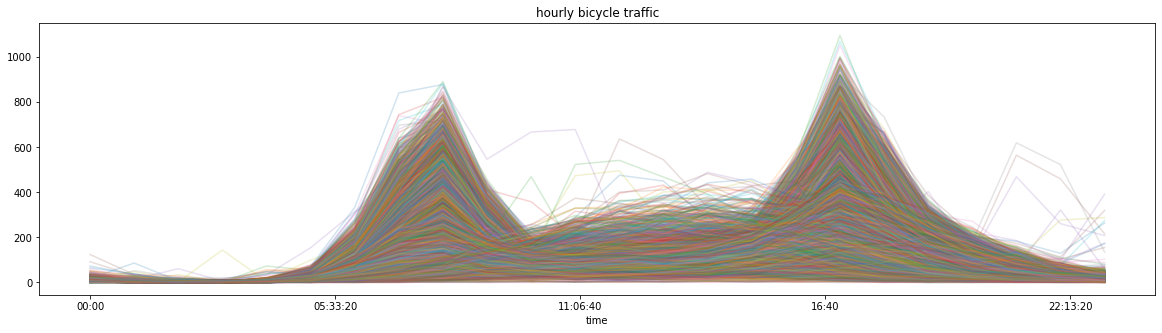

In [10]:
data_table.plot(legend=False,alpha=0.2, figsize=(20,5), title='hourly bicycle traffic')
#plt.title('hourly bicycle traffic (2012-2021)',fontsize=20)

In [12]:
days = data_table.T
from sklearn.cluster import KMeans

Text(0, 0.5, 'inertia')

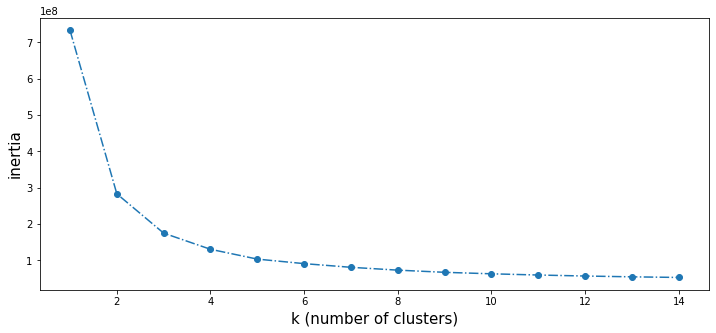

In [13]:
k_list = np.arange(1,15)
inertias = []
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(days)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(12,5))
plt.plot(k_list,inertias,'o-.')
plt.xlabel('k (number of clusters)', fontsize=15)
plt.ylabel('inertia', fontsize=15)

In [14]:
# k=2,3,4 seems a good choice

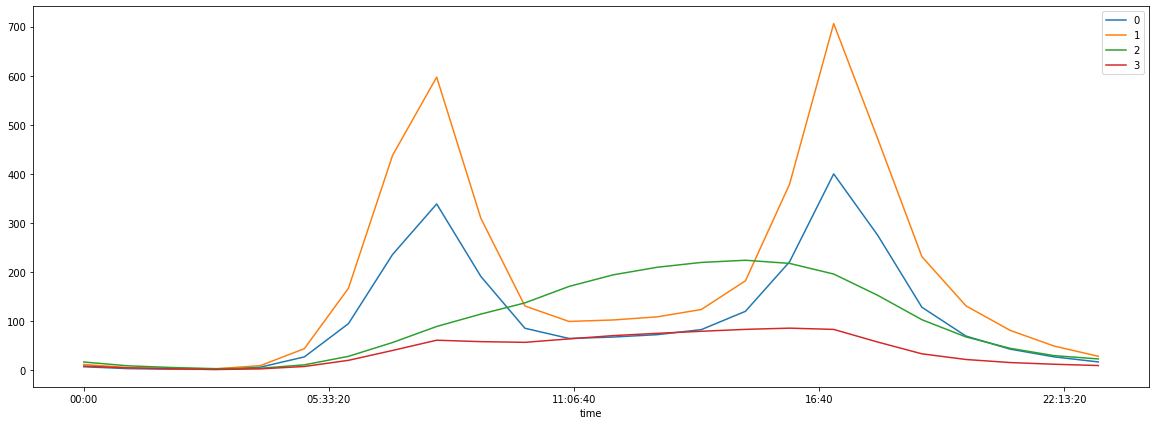

In [25]:
k = 4
cluster = KMeans(n_clusters=k)
cluster.fit(days)

centers = cluster.cluster_centers_
labels = cluster.labels_

cluster_centers = pd.DataFrame(centers.T, index=data_table.index)

# plot cluster centers
fig, ax = plt.subplots(figsize=(20,7))
for i in range(k):
    cluster_centers[i].plot(ax=ax)
plt.legend()

In [17]:
cluster_centers.plot(figsize=(20,5))

<AxesSubplot:xlabel='time'>

In [ ]:
# clusters 0,2: weekdays
# clusters 1,3: weekends and holidays

In [48]:
pd.to_datetime(days[labels==0].index).dayofweek.value_counts()

1    189
2    186
0    170
3    167
4    111
dtype: int64

In [49]:
pd.to_datetime(days[labels==1].index).dayofweek.value_counts()

5    224
6    219
4     37
0     35
2     14
3     13
1     10
dtype: int64

## Example 2: image segmentation

The goal is to partition an image into multiple segments. In this example, we will cluster pixels based on color intensities (color segmentation).

In [1]:
import matplotlib.pyplot as plt

In [7]:
# load image
image = plt.imread('Tova_the_cat.png')

In [10]:
# display image
plt.imshow(image)
plt.axis(False)

(-0.5, 293.5, 219.5, -0.5)

In [8]:
# 220x294 pixels (3 color channels, red, green and blue)
image.shape

(220, 294, 3)

In [11]:
# reshape the array to get a long list of RGB colors
X = image.reshape(220*294,3)

In [12]:
from sklearn.cluster import KMeans

(-0.5, 293.5, 219.5, -0.5)

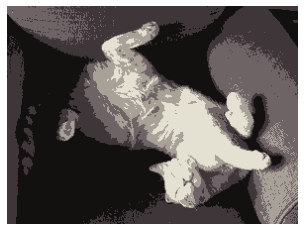

In [21]:
# cluster colors
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
# replace each color by its cluster center
segmented_image = centers[labels].reshape(220,294,3)
# display segmented image
plt.imshow(segmented_image)
plt.axis(False)

## Example 3: topic modeling

The goal is to discover the latent "topics'' that occur in a collection of documents.

In [23]:
from sklearn.datasets import fetch_20newsgroups

In [28]:
categories = [
    'alt.atheism',
    'comp.windows.x',
    'rec.autos',
    'rec.sport.baseball',
    'sci.electronics',
    'sci.space',
]

docs = fetch_20newsgroups(subset='all', 
                                categories=categories,
                                remove=('headers', 'footers', 'quotes')
                          )

In [29]:
data = pd.DataFrame({'doc' : docs['data'], 
                           'category' : docs['target']})
data.head()

doc  category
0  \n   McDonnell Douglas rolls out DC-X\n\n ...\...         5
1  \nPortuguese launch complex??? Gosh.... Polish...         5
2                                             ^^^...         4
3  [reply to jimh@carson.u.washington.edu (James ...         0
4  Let's look at the effects of inflation on 1930...         3

In [30]:
docs['target_names']

['alt.atheism',
 'comp.windows.x',
 'rec.autos',
 'rec.sport.baseball',
 'sci.electronics',
 'sci.space']

In [245]:
# preprocess docs
import nltk 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')  
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

def process_pos(pos):
    if pos.startswith('J'): # adjectives
        return wordnet.ADJ
    elif pos.startswith('V'): # verbes
        return wordnet.VERB
    elif pos.startswith('N'): # nouns
        return wordnet.NOUN
    elif pos.startswith('R'): # adverbs
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import string
punctuation = [punc for punc in string.punctuation]

def process_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word, pos=process_pos(pos)) 
                        for word,pos in nltk.pos_tag(words) 
                        if word not in stop_words # remove stop words
                        and word not in punctuation # remove punctuations
 ] 
    return ' '.join(lemmatized_words)

[nltk_data] Downloading package wordnet to C:\Users\javier.perez-
[nltk_data]     alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\javier.perez-
[nltk_data]     alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\javier.perez-
[nltk_data]     alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\javier.perez-
[nltk_data]     alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [247]:
data['processed_doc'] = data.doc.apply(process_text)

In [ ]:
data.processed_doc[0]

In [248]:
# word frequencies
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=10000)

In [249]:
X = vect.fit_transform(data.processed_doc)

In [250]:
len(vect.get_feature_names())

10000

In [251]:
k = 15
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_

In [252]:
# clusters = topics?
cluster = 1
data.loc[labels==cluster,'category'].value_counts()

0    24
3     6
Name: category, dtype: int64

In [253]:
# top 10 words in each cluster 
words_df = pd.DataFrame(data = X.toarray(),columns=vect.get_feature_names())
words_df

00       000  00000  0060  007   01  0123456789  015   02  02139  ...  \
0     0.0  0.000000    0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0  ...   
1     0.0  0.000000    0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0  ...   
2     0.0  0.000000    0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0  ...   
3     0.0  0.000000    0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0  ...   
4     0.0  0.514835    0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0  ...   
...   ...       ...    ...   ...  ...  ...         ...  ...  ...    ...  ...   
5737  0.0  0.000000    0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0  ...   
5738  0.0  0.000000    0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0  ...   
5739  0.0  0.000000    0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0  ...   
5740  0.0  0.000000    0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0  ...   
5741  0.0  0.000000    0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0  ...   

      zip   zo  zodiacal  zok  zone  zoo  zoom   zt  zupcic   zx  
0     0.0  0.0       0.0  0.0   0.0  0.0   0.0  0.0     0.0  0.0  
1     0.0  0.0       0.0  0.0   0.0  0.0   0.0  0.0     0.0  0.0  
2     0.0  0.0       0.0  0.0   0.0  0.0   0.0  0.0     0.0  0.0  
3     0.0  0.0       0.0  0.0   0.0  0.0   0.0  0.0     0.0  0.0  
4     0.0  0.0       0.0  0.0   0.0  0.0   0.0  0.0     0.0  0.0  
...   ...  ...       ...  ...   ...  ...   ...  ...     ...  ...  
5737  0.0  0.0       0.0  0.0   0.0  0.0   0.0  0.0     0.0  0.0  
5738  0.0  0.0       0.0  0.0   0.0  0.0   0.0  0.0     0.0  0.0  
5739  0.0  0.0       0.0  0.0   0.0  0.0   0.0  0.0     0.0  0.0  
5740  0.0  0.0       0.0  0.0   0.0  0.0   0.0  0.0     0.0  0.0  
5741  0.0  0.0       0.0  0.0   0.0  0.0   0.0  0.0     0.0  0.0  

[5742 rows x 10000 columns]

In [254]:
for i in range(k):
    print('---------------------------')
    print(words_df[labels==i].mean().sort_values(ascending=False).head(10).index)
    print('---------------------------')

---------------------------
Index(['thanks', 'please', 'mail', 'list', 'anyone', 'advance', 'send', 'know',
       'someone', 'could'],
      dtype='object')
---------------------------
---------------------------
Index(['ico', 'bobbe', 'manhattan', 'beauchaine', 'bronx', 'tek', 'queen',
       'vice', 'sea', 'sink'],
      dtype='object')
---------------------------
---------------------------
Index(['window', 'manager', 'application', 'program', 'use', 'event', 'run',
       'get', 'display', 'thanks'],
      dtype='object')
---------------------------
---------------------------
Index(['car', 'get', 'dealer', 'price', 'buy', 'one', 'would', 'drive', 'good',
       'like'],
      dtype='object')
---------------------------
---------------------------
Index(['god', 'religion', 'say', 'atheist', 'people', 'belief', 'believe',
       'one', 'moral', 'think'],
      dtype='object')
---------------------------
---------------------------
Index(['detector', 'radar', 'geico', 'ka', 'burst',

## Example 3: Customer segmentation

Customer segmentation is the process of dividing customers into groups based on common characteristics

In [255]:
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data.columns = ['gender','age','income','score']
data.head()

gender  age  income  score
CustomerID                            
1             Male   19      15     39
2             Male   21      15     81
3           Female   20      16      6
4           Female   23      16     77
5           Female   31      17     40

The dataset contains the basic information (ID, age, gender, income, spending score) about the customers.

In [260]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans

In [264]:
processor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(),['gender']),
    ('scaler', MinMaxScaler(),['age','income','score'])
])


k = 5
pipe = Pipeline(steps=[
    ('processor',processor),
    ('clusterer',KMeans(n_clusters=k))
])

In [265]:
pipe.fit(data)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['gender']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['age', 'income',
                                                   'score'])])),
                ('clusterer', KMeans(n_clusters=5))])

In [267]:
labels = pipe['clusterer'].labels_

cluster 0: female, young, medium annual income, high score
cluster 1: male, young, medium annual income, high score
cluster 2: male, old, medium annual income, low score
cluster 3: female, middle age, medium annual income, low score
cluster 4: male, middle age, high annual income, low score

In [277]:
cluster = 4
data.loc[labels==cluster,'gender'].value_counts()

Male    20
Name: gender, dtype: int64

In [282]:
cluster = 4
data.loc[labels==cluster,'age'].mean()

38.4

In [296]:
cluster = 4
data.loc[labels==cluster,'income'].mean()

82.6

In [302]:
cluster = 4
data.loc[labels==cluster,'score'].mean()

14.15

In [298]:
data.score.max(), data.score.min()

(99, 1)